In [1]:
import sys
sys.version

'3.7.5 (default, Nov  7 2019, 10:50:52) \n[GCC 8.3.0]'

# Chapter 5 - Bayes' Rule

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt
from matplotlib import cm  # color map
import seaborn as sns
sns.set()

In [3]:
%load_ext watermark
%watermark -p pandas,numpy,pymc3,matplotlib,seaborn

pandas    : 1.1.4
numpy     : 1.19.3
pymc3     : 3.10.0
matplotlib: 3.3.0
seaborn   : 0.11.0



## Chapter 5.3. Complete Examples: Estimating Bias in Coins

In [5]:
def normalize(a):
    return a / a.sum()

In [10]:
theta_grid = np.linspace(0, 1, 11)
prior = normalize(np.array([0, .1, .2, .3, .4, .5, .4, .3, .2, .1, 0]))

In [13]:
theta_grid

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [14]:
prior

array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.16, 0.12, 0.08, 0.04, 0.  ])

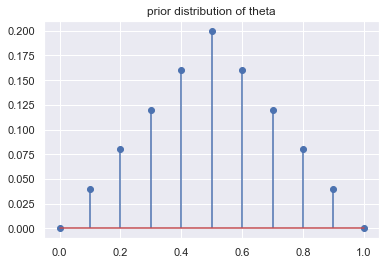

In [21]:
plt.stem(theta_grid, prior)
plt.title('prior distribution of theta');

In [34]:
def bernoulli(y1, th):  # Bernoulli distr.
    return th if y1 else 1-th
def likelihood(y, th):  # p(y|th), 
    r = [bernoulli(yi, th) for yi in y]
    return np.prod(r)

In [35]:
likelihood([0, 0], .2)

0.6400000000000001

In [36]:
y = [1]
likeli = np.array([likeli(y, th) for th in theta_grid])
likeli

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

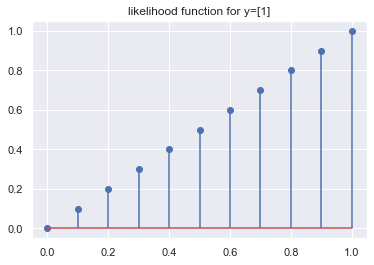

In [38]:
plt.stem(theta_grid, likeli);
plt.title(f'likelihood function for y={y}');

In [39]:
posterior = normalize(likeli * prior)

<StemContainer object of 3 artists>

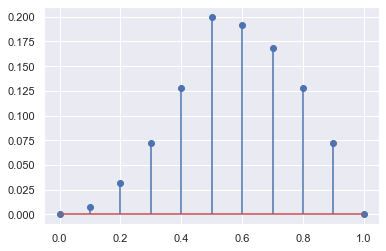

In [40]:
plt.stem(theta_grid, posterior)